In [1]:
%load_ext pypath_magic
%pypath -a /home/vlad/projects/datamanagers/daily/

UsageError: '/home/vlad/projects/datamanagers/daily' is already in the user path.


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import scipy as sp
import pandas as pd

from daily.datamanager import DailyDataManager

import qplot.activate
from qplot import get_axes, set_mpl_layout, set_plotly_layout
import matplotlib.pyplot as plt

2020-10-15 09:18:35.253 | INFO     | qplot.activate:<module>:26 - IPython detected, applying inline plotting and svg figure format.


In [3]:
ddm = DailyDataManager()
df = ddm.get_data('fx_rates')

In [4]:
df

currency       AUD     CAD     CZK     EUR     GBP     JPY     NOK     SEK
date                                                                      
2001-07-23  0.5079     NaN     NaN  0.8684  1.4184     NaN     NaN     NaN
2001-07-24  0.5074     NaN     NaN  0.8751  1.4238     NaN     NaN     NaN
2001-07-25  0.5071     NaN     NaN  0.8800  1.4271     NaN     NaN     NaN
2001-07-26  0.5082     NaN     NaN  0.8779  1.4280     NaN     NaN     NaN
2001-07-27  0.5077     NaN     NaN  0.8760  1.4239     NaN     NaN     NaN
...            ...     ...     ...     ...     ...     ...     ...     ...
2020-09-15  0.7298  0.7583  0.0442  1.1847  1.2890  0.0095  0.1105  0.1134
2020-09-16  0.7301  0.7588  0.0442  1.1815  1.2967  0.0095  0.1106  0.1132
2020-09-17  0.7308  0.7592  0.0443  1.1842  1.2971  0.0095  0.1103  0.1135
2020-09-18  0.7284  0.7567  0.0442  1.1839  1.2914  0.0096  0.1100  0.1136
2020-09-21  0.7220  0.7514  0.0433  1.1766  1.2815  0.0095  0.1076  0.1126

[5000 rows x 8 columns]

In [5]:
ser = df['GBP'].loc['2010':]
rets = ser.pct_change().fillna(0)

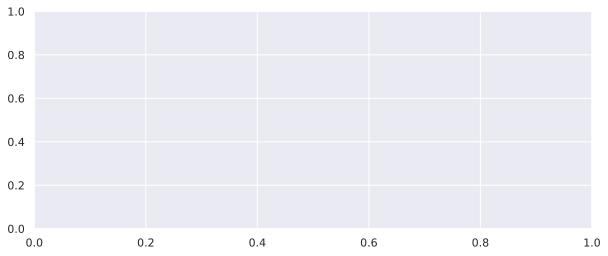

In [6]:
ax = get_axes(8)
ret_vals = rets.to_numpy()
ret_norm = ret_vals/np.std(ret_vals)
ret_norm = ret_norm[np.abs(ret_norm) < 2] 
ret_norm = ret_norm/np.std(ret_norm)
#ret_norm = np.clip(ret_norm, -3, 3)

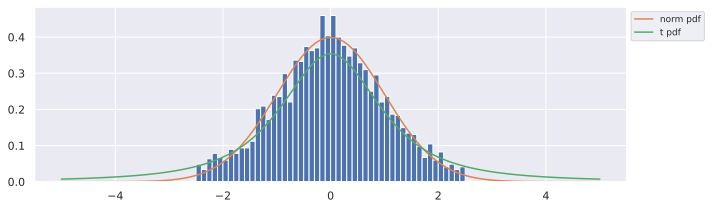

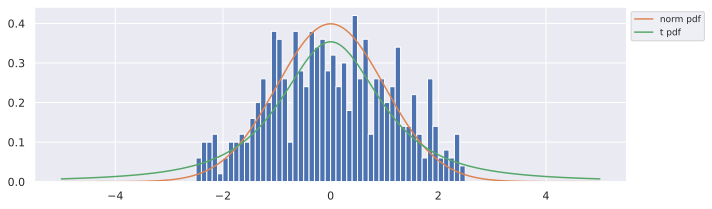

In [7]:
def plot_hist(ret_norm):
    ax = get_axes(6)
    ax.hist(ret_norm, bins=100, range=(-5, 5), density=True);
    
    xvals = np.linspace(-5, 5, 1000)
    ax.plot(xvals, sp.stats.norm.pdf(xvals), label='norm pdf');
    ax.plot(xvals, sp.stats.t.pdf(xvals, df=2), label='t pdf');
    set_mpl_layout(ax);

plot_hist(ret_norm)
plot_hist(ret_norm[:500])

In [216]:
ret_norm.size

2675

In [116]:
sp.stats.kurtosis(ret_norm)

rng = np.random.default_rng()
norm_sample = rng.standard_normal(size=1000000)
t_sample = rng.standard_t(df=5, size=1000000)
sp.stats.kurtosis(norm_sample)
sp.stats.kurtosis(t_sample)

-0.2719467270600582

0.002312937839012541

0.0037769472208077914

In [117]:
sp.stats.moment(ret_norm, moment=4)/np.var(ret_norm)**2
sp.stats.kurtosis(ret_norm, fisher=True)

2.728053272939942

-0.2719467270600582

In [109]:
np.std(ret_norm)

1.0

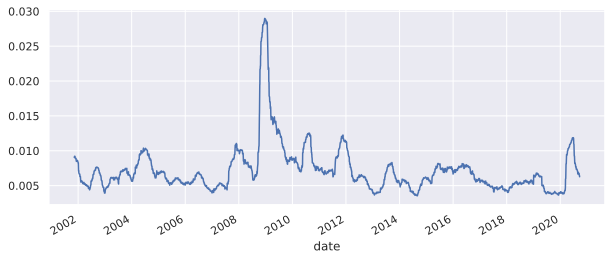

In [59]:
rets.rolling(80).std().plot(ax=get_axes(8));

In [49]:
sp.stats.skew(ret_norm)

-0.42676874369748896

In [44]:
np.mean(ret_norm)/np.std(ret_norm)

0.012838245350427518

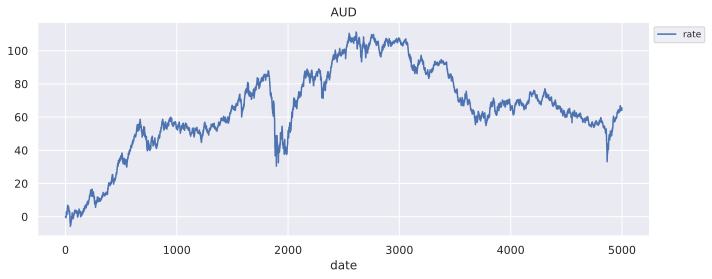

In [53]:
ax = get_axes(8)
ax.plot(ret_norm.cumsum(), label='rate');
set_mpl_layout(ax, title='AUD', xlabel='date')

In [72]:
ret_norm[ret_norm==0].size
ret_norm.size

5000

In [118]:
ret_norm

array([ 0.        , -1.07850572, -1.38940259, ...,  0.06896117,
       -0.98239365, -1.71379378])

In [128]:
np.quantile(ret_norm, 0.2)

-0.8633816032752164

In [137]:
import statsmodels.api as sm

AttributeError: module 'scipy.stats' has no attribute 'standard_t'

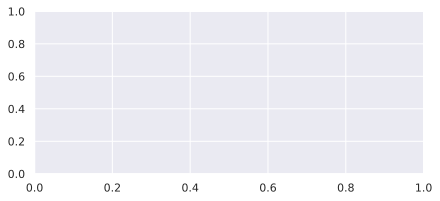

In [147]:
ax = get_axes(6, small=True)
sm.qqplot(ret_norm, ax=ax, line='45', dist=sp.stats.standard_t);

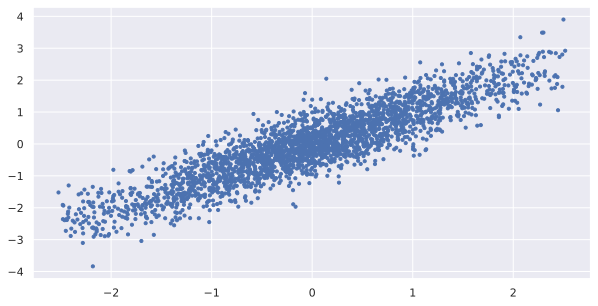

In [174]:
x = ret_norm
y = ret_norm + 0.5*rng.standard_normal(size=x.size)
get_axes().scatter(x, y, s=10);

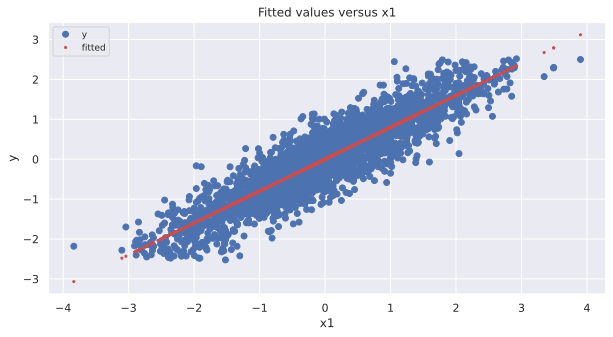

In [204]:
sm.graphics.plot_fit(sm.OLS(x, y).fit(), 0, vlines=False, ax=get_axes(), markersize=3, marker='*');

In [188]:
sp.stats.mstats.winsorize(ret_norm, limits=(0.05, 0.95))

masked_array(data=[-1.73309458, -1.73309458, -1.73309458, ...,
                   -1.73309458, -1.73309458, -1.73309458],
             mask=False,
       fill_value=1e+20)

In [199]:
def remove_nans(arr):
    return arr[~np.isnan(arr)]


df.rolling(500).apply(lambda x: np.quantile(remove_nans(x.flatten()), 0.2), raw=True)

currency        AUD      CAD     CZK      EUR      GBP    JPY     NOK      SEK
date                                                                          
2001-07-23      NaN      NaN     NaN      NaN      NaN    NaN     NaN      NaN
2001-07-24      NaN      NaN     NaN      NaN      NaN    NaN     NaN      NaN
2001-07-25      NaN      NaN     NaN      NaN      NaN    NaN     NaN      NaN
2001-07-26      NaN      NaN     NaN      NaN      NaN    NaN     NaN      NaN
2001-07-27      NaN      NaN     NaN      NaN      NaN    NaN     NaN      NaN
...             ...      ...     ...      ...      ...    ...     ...      ...
2020-09-15  0.67496  0.73978  0.0425  1.10274  1.24368  0.009  0.1076  0.10288
2020-09-16  0.67496  0.73978  0.0425  1.10274  1.24368  0.009  0.1076  0.10288
2020-09-17  0.67496  0.73978  0.0425  1.10274  1.24368  0.009  0.1076  0.10288
2020-09-18  0.67496  0.73978  0.0425  1.10274  1.24368  0.009  0.1076  0.10288
2020-09-21  0.67496  0.73978  0.0425  1.10274  1.24368  0.009  0.1076  0.10288

[5000 rows x 8 columns]

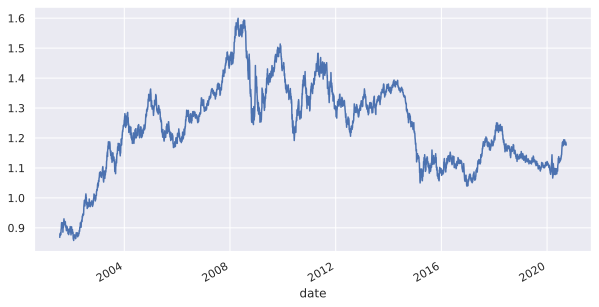

In [208]:
df['EUR'].plot(ax=get_axes());

In [220]:
x = rng.standard_normal(size=10) + 1
x

sm.OLS(x, 1).fit().summary()

array([1.34024166, 1.81115324, 0.17634377, 0.29222082, 1.56757808,
       2.35816403, 1.33255313, 0.98985132, 0.95494793, 0.28874938])

ValueError: unrecognized data structures: <class 'numpy.ndarray'> / <class 'int'>

In [222]:
sm.add_constant([])

ValueError: zero-size array to reduction operation maximum which has no identity

In [224]:
sm.OLS(x, np.ones_like(x)).fit().summary()

/home/vlad/miniconda3/envs/daily/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 05 Oct 2020   Prob (F-statistic):                nan
Time:                        15:27:25   Log-Likelihood:                -10.323
No. Observations:                  10   AIC:                             22.65
Df Residuals:                       9   BIC:                             22.95
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1112      0.226      4.907      0.001       0.599       1.623
==============================================================================
Omnibus:                        0.260   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.878   Jarque-Bera (JB):                0.409
Skew:                           0.150   Prob(JB):                        0.815
Kurtosis:                       2.056   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
np.mean(x)/np.std(x)

1.635709608103907

In [226]:
import modin.pandas as mpd

In [233]:
%timeit df.apply(lambda x: np.quantile(x, 0.2), axis=1)

445 ms ± 7.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [230]:
mdf = mpd.DataFrame(df)

In [232]:
%timeit mdf.apply(lambda x: np.quantile(x, 0.2), axis=1)

147 ms ± 21.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Statsmodels time series analysis

In [238]:
sm.tsa.acf(rets, nlags=12)

array([ 1.        ,  0.01270496,  0.01417138, -0.00374648,  0.00927742,
       -0.03533895,  0.00720963, -0.01627793, -0.02447797, -0.01990779,
       -0.01611854, -0.016879  , -0.01117573])

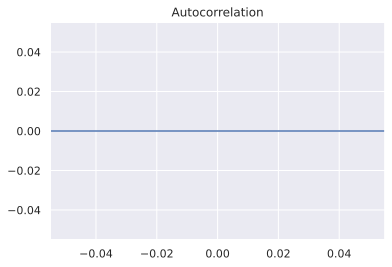

In [242]:
sm.graphics.tsa.plot_acf(df['JPY'].pct_change(), lags=range(1, 12));

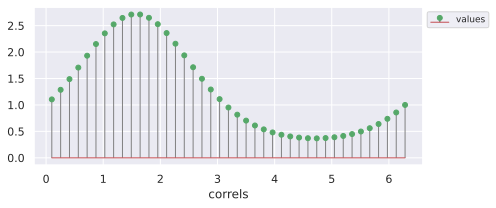

In [281]:
x = np.linspace(0.1, 2 * np.pi, 41)
y = np.exp(np.sin(x))

# move to qplot (als)
def stem_plot(xvals, yvals, ax=None, marker='o', marker_color='b', marker_size=5, base_color='r', base_lw=1, stem_color='grey', stem_lw=1):
    if ax is None:
        ax = plt.gca()
    markerline, stemlines, baseline = ax.stem(x, y, label='values')
    plt.setp(baseline, color=base_color, linewidth=base_lw)
    plt.setp(stemlines, color=stem_color, linewidth=stem_lw)
    plt.setp(markerline, marker=marker, color=marker_color, markersize=marker_size)
    set_mpl_layout(ax, xlabel='correls')

stem_plot(x, y, ax=get_axes(6, small=True), marker_color='g')

## TSA, correlation analysis, ACF, CCF, PACF, ARMA models

## Filtering, convolutions, moving averages, MA, EMA, weighted MA, fourier analysis and wavelets

In [ ]:
x = np.array([1, 2, 3, 4])

np.convolve 

In [13]:
import statsmodels.api as sm

In [16]:
x = rets.shift().fillna(0)
y = rets
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GBP   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.4611
Date:                Wed, 07 Oct 2020   Prob (F-statistic):                       0.497
Time:                        09:42:20   Log-Likelihood:                          10504.
No. Observations:                2796   AIC:                                 -2.101e+04
Df Residuals:                    2795   BIC:                                 -2.100e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GBP            0.0128      0.019      0.679      0.497      -0.024       0.050
==============================================================================
Omnibus:                     1013.267   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33825.009
Skew:                          -1.064   Prob(JB):                         0.00
Kurtosis:                      19.906   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

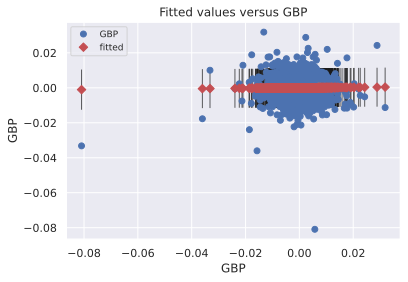

In [21]:
sm.graphics.plot_fit(result, 'GBP');

In [23]:
import seaborn as sns

<AxesSubplot:xlabel='GBP', ylabel='GBP'>

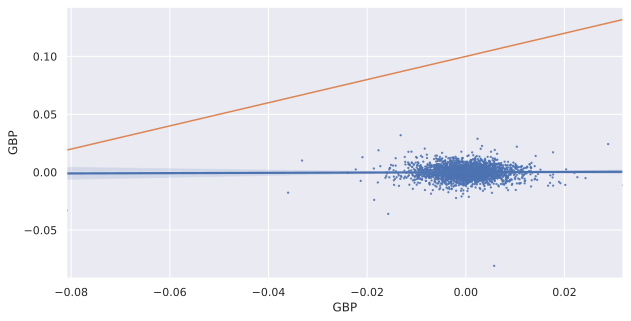

In [38]:
ax = get_axes()
sns.regplot(x=x, y=y, ax=ax, scatter_kws={'s': 2, 'marker': '.'});
plot_func(lambda x: x+0.1, ax)

In [36]:
def plot_func(func, ax, n_points=1000):
    func = np.vectorize(func)
    xvals = np.linspace(*ax.get_xlim(), n_points)
    ax.plot(xvals, func(xvals))

## seaborn

* bar plot with different colors depending on a categorical variable
* histogram with stacked bar representing different groups 
* bar plots - histograms with multiple groups
* fitting density curve, how to choose optimal parameter, comparing different distributions
* horizontal plots
* heatmap (choosing range, cmap, adding )


what is CI varying plot on line plot with fit??

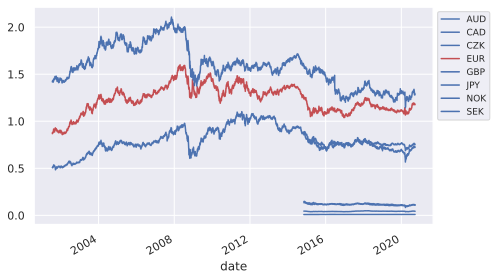

In [25]:
ax = get_axes(8, small=True)
colors = (df.columns.to_series() == 'EUR').map({True: 'r', False: 'b'}).to_numpy()
df.plot(color=colors, ax=ax);
set_mpl_layout(ax)

In [8]:
df

currency       AUD     CAD     CZK     EUR     GBP     JPY     NOK     SEK
date                                                                      
2001-07-23  0.5079     NaN     NaN  0.8684  1.4184     NaN     NaN     NaN
2001-07-24  0.5074     NaN     NaN  0.8751  1.4238     NaN     NaN     NaN
2001-07-25  0.5071     NaN     NaN  0.8800  1.4271     NaN     NaN     NaN
2001-07-26  0.5082     NaN     NaN  0.8779  1.4280     NaN     NaN     NaN
2001-07-27  0.5077     NaN     NaN  0.8760  1.4239     NaN     NaN     NaN
...            ...     ...     ...     ...     ...     ...     ...     ...
2020-09-15  0.7298  0.7583  0.0442  1.1847  1.2890  0.0095  0.1105  0.1134
2020-09-16  0.7301  0.7588  0.0442  1.1815  1.2967  0.0095  0.1106  0.1132
2020-09-17  0.7308  0.7592  0.0443  1.1842  1.2971  0.0095  0.1103  0.1135
2020-09-18  0.7284  0.7567  0.0442  1.1839  1.2914  0.0096  0.1100  0.1136
2020-09-21  0.7220  0.7514  0.0433  1.1766  1.2815  0.0095  0.1076  0.1126

[5000 rows x 8 columns]

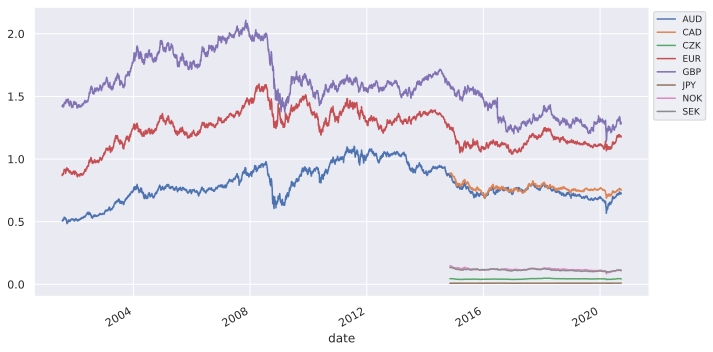

In [13]:
ax = get_axes()
df.plot(ax=ax)
set_mpl_layout(ax)

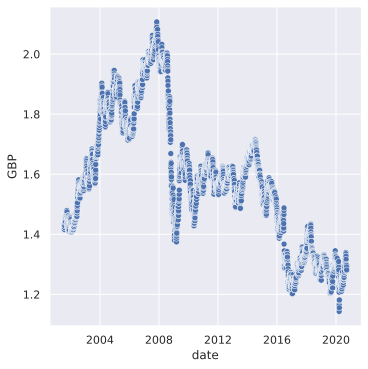

In [14]:
import seaborn as sns
sns.relplot(x=df.index, y=df['GBP'])